We’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we and our partners decide to try to attract investors.<br>
They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?<br>
We’re an analytics guru, so let's prepare some market research!<br>
We have open-source data on restaurants in LA.

Data description:
* rest_data  table:
* object_name — establishment name
* chain — chain establishment boolean
* object_type  — establishment type
* address — address

 Research plan:
<a class="anchor" id="table_of_contents"></a>

[table_of_contents](#table_of_contents)

1. [look at general information of the data](#general_information)
    * Load libraries and install packages.
    * Load data
2. [preprocess](#preprocess)
    * Take care of missing values
    * Look for missing values
    * Look for duplicates
    * Check types
    * Check for anomalies(very larg, very small, incorrect data)
3. [Data analysis:](#Data_analysis)
    * Investigate the proportions of the various types of establishments. Plot a graph. 
    * Investigate the proportions of chain and nonchain establishments. Plot a graph. 
    * Which type of establishment is typically a chain? 
    * What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? 
    * Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs. 
    * Project Description2Put the data on street names from the address  column in a separate column. 
    * Plot a graph of the top ten streets by number of restaurants. 
    * Find the number of streets that only have one restaurant.
    * For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

<a class='anchor' id='general_information'></a>
[Go back to the Table of Contents](#table_of_contents)
## [look at general information of the data](#general_information)

In [92]:
!pip install -q --user --upgrade pandas
!pip install -q --user --upgrade matplotlib
!pip install -q --user --upgrade seaborn
!pip install -q --user --upgrade usaddress

In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [93]:
#importing library to handle address
import usaddress

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(10, 6)})

import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import scipy.stats as stats

In [157]:
try:
    estab_df = pd.read_csv ('/datasets/rest_data_us.csv')
    
except:  
    estab_df = pd.read_csv ('/datasets/rest_data_us.csv')

<a class='anchor' id='preprocess'></a>
[Go back to the Table of Contents](#table_of_contents)
## [preprocess](#preprocess)

We will explore the data and as we explore we will look for:
* missing values
* duplicates
* anomalies

And we will fix them as we go a long.

In [159]:
estab_df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


* **Objct_name** all strings are uppercase
* **address** has a combination of letters, number and symboles # 
* **chain** is boolean
* **object_type** is capitalize
* **number** is integer

Lets lower the case of all the values so we have consitent data and not miss any values while exploring and filtering.

In [6]:
lower_cols = ['object_name', 'address','object_type']
for col in lower_cols:
    estab_df[col] = estab_df[col].str.lower()
estab_df.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26
1,11787,reilly's,100 world way # 120,False,restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22
4,11790,pollen,2100 echo park ave,False,restaurant,20


Lowered case of values.

-----------------

**Next we lets continue exploring**

In [7]:
estab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


**We have 3 missing values in chain column**

Lets check the establishments and figure out what to do with these.

In [8]:
estab_chain_na = estab_df[estab_df.chain.isna()]
estab_chain_na

,id,object_name,address,chain,object_type,number
7408,19194,taqueria los 3 carnales,5000 e whittier blvd,NaN,restaurant,14
7523,19309,jammin jimmy's pizza,1641 firestone blvd,NaN,pizza,1
8648,20434,the lexington theater,129 e 3rd st,NaN,restaurant,35


Lets look for all the extablishments with na and check if there are more of the same name

In [9]:
names_ls = estab_chain_na.object_name.tolist()
for name in names_ls:
    display(estab_df[estab_df.object_name == name].address.value_counts())

5000 e whittier blvd    1
Name: address, dtype: int64

1641 firestone blvd    1
Name: address, dtype: int64

129 e 3rd st    1
Name: address, dtype: int64

We see all establishments with na have one address so we will change their chain value to **FALEs**

In [10]:
for name in names_ls:
    estab_df.loc[estab_df.object_name == name, 'chain'] = True

estab_df[estab_df.chain.isna()]


,id,object_name,address,chain,object_type,number


Fixed na values

----------------------
**Next we will check for duplicates in columns**

In [11]:
estab_df.id.value_counts()

11786    1
18214    1
18216    1
18217    1
18218    1
        ..
15003    1
15004    1
15005    1
15006    1
21436    1
Name: id, Length: 9651, dtype: int64

**id** has **9651 rows** which eaqual the number of rows in the data frame, meaning **all id are unique**

In [12]:
estab_df.object_name.value_counts()

the coffee bean & tea leaf    47
subway                        31
domino's pizza                15
kentucky fried chicken        14
waba grill                    14
                              ..
bamboo inn                     1
el carmen                      1
cole's                         1
h & h catering pool bar        1
cafe sprouts                   1
Name: object_name, Length: 8672, dtype: int64

We have a couple of repeating names, if these names are part of a chain than everything is fine.<br>
Lets make sure.

In [13]:
estab_no_chain = estab_df[estab_df.chain == False]
estab_no_chain_count = estab_no_chain.object_name.value_counts()
display(estab_no_chain_count[estab_no_chain_count > 1].count())

27

We have 27 establishments that have more than 1 store and are not considered a chain.<br>
Maybe they have the same address and are duplicates by accident.
* If so we will **remove duplicates**.
* if not than we will change their chain value to **true**.

In [14]:
estab_no_chain[['object_name','address']].duplicated().sum()

0

Establishments with the **same name** and different address do not exist, meaning we will change these establishments  chain value to **true**.<br>

In [15]:
names_to_change_chain = estab_no_chain_count[estab_no_chain_count > 1].index.tolist()
for name in names_to_change_chain:
    estab_df.loc[estab_df.object_name == name, 'chain'] = True
    
# lets check to make sure
estab_no_chain = estab_df[estab_df.chain == False]
estab_no_chain_count = estab_no_chain.object_name.value_counts()
display(estab_no_chain_count[estab_no_chain_count > 1].count())

0

We have fixed establishments with wrong chain value.

--------
Lets check address

In [16]:
estab_df.address.value_counts()

3607 trousdale pkwy            11
135 n grand ave                10
400 world way                   9
5151 state university dr        9
600 world way                   9
                               ..
12746 jefferson blvd            1
3600 wilshire blvd ste 100b     1
308 westwood plz ste a260       1
6333 w 3rd st ste e-11          1
1300 s san pedro st ste 111     1
Name: address, Length: 8513, dtype: int64

We found establishments with the same address (3607 trousdale pkwy, 11 establishments).<br>
The numbers are not to big, these places might be a shopping center that concentrates a lot of establishments, we will leave it as so.

-----------
**Next we will check for bad values in number we won't do so for the other string columns since there can be many different issues and we do not have the resources (list of all address in the area) to check it's validity)**

In [17]:
seats_counts = estab_df.number.value_counts()
display(seats_counts)
seats_counts[seats_counts.index < 2 ]

12     204
19     203
25     203
5      198
11     197
      ... 
197      3
173      2
154      2
179      1
183      1
Name: number, Length: 216, dtype: int64

1    187
Name: number, dtype: int64

We do not have places with zero seats, we do have 187 places with 1 seats.
these places might be exclusive establishments or perhaps over the counter (just a window to alow sales) places.

### Preprocessing summary:

* We found 3 missing values in chain column and fixed to true.
* We found duplicates in object_name that are no chains (27) We have fixed establishments with wrong chain value.
* We checked address and considered the data proper.
* We checked number and considered the data proper.


<a class='anchor' id='Data_analysis'></a>
[Go back to the Table of Contents](#table_of_contents)
## [Data analysis:](#Data_analysis)




**Investigate the proportions of the various types of establishments. Plot a graph.**

In [27]:
estab_type_count = estab_df.object_type.value_counts()
estab_type_count.name = 'establishments'

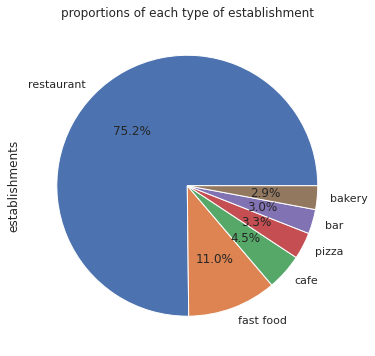

In [29]:
estab_type_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('proportions of each type of establishment');

We can see resturant take **75.2%** of all establishments, that's very big.<br>
Trying to compete in this sector might be tricky, restaurants are regarded as leisure time activities.<br>
Robot serving might be less satisfactory and problematic to address customers needs.


-----------
**Investigate the proportions of chain and nonchain establishments.**

False    5916
True     3735
Name: chain, dtype: int64

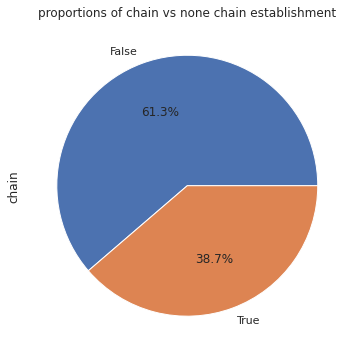

In [32]:
estab_chain_count = estab_df.chain.value_counts()
display(estab_chain_count)

estab_chain_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('proportions of chain vs none chain establishment');

We see a **61.3%** in none chain establishments.<br>
Our service is more suitable for a chain, lets explore chain types.

-------
**Which type of establishment is typically a chain?**

restaurant    2335
fast food      613
bakery         283
cafe           267
pizza          158
bar             79
Name: object_type, dtype: int64

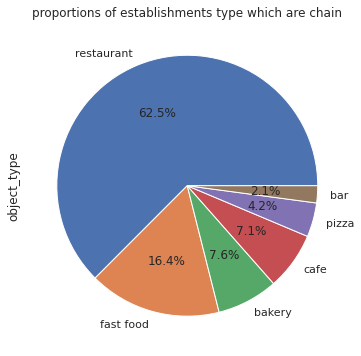

In [36]:
estab_chain_type_count = estab_df[estab_df.chain == True].object_type.value_counts()
display(estab_chain_type_count)
estab_chain_type_count.plot(kind='pie' , autopct='%1.1f%%')
plt.title('proportions of establishments type which are chain');

There is a reduction in proportion of about 13%(75.2% to 62.5%).<br>
We see a 5% increase in fast food resturant, which makes sense.Fast food are built to become chains.<br>
**But resturant still have the biggest proportions out of all types of establishments**<br>
We should take notice at fast food, robotic service can flourish in these types.

--------------
**What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?**

Lets catagorized these chains.

In [38]:
def catagorize_by_seats(num):
    if num < 6:
        return 'very small'
    if num < 11:
        return 'small'
    if num < 21:
        return 'medium'
    if num < 51:
        return 'large'
    return 'very large'

estab_df['size'] = estab_df.number.apply(catagorize_by_seats)
estab_df

,id,object_name,address,chain,object_type,number,size
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26,large
1,11787,reilly's,100 world way # 120,False,restaurant,9,small
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,medium
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,large
4,11790,pollen,2100 echo park ave,False,restaurant,20,medium
...,...,...,...,...,...,...,...
9646,21432,hall of justice,217 w temple ave,False,restaurant,122,very large
9647,21433,fin-melrose,5750 melrose ave,False,restaurant,93,very large
9648,21434,juicy wingz,6741 hollywood blvd,True,fast food,15,medium
9649,21435,medidate coffee,548 s spring st ste 100,False,cafe,6,small


Next we will count by size.

In [46]:
estab_chain = estab_df[estab_df.chain == True]
display(estab_chain['size'].value_counts())
estab_chain['size'].value_counts(normalize=True) * 100

large         1574
medium         785
very large     659
very small     380
small          337
Name: size, dtype: int64

large         42.141901
medium        21.017403
very large    17.643909
very small    10.174029
small          9.022758
Name: size, dtype: float64

More than **80%** of establishments are **more** than 11 seats.<br>
Chain puts emphasis on volumn of clients entering and being served.

Robotic service might succeed in these low volume establishments, we might regard them similar to vending machine, serving one customer at a time.

---------------
**Determine the average number of seats for each type of establishment. On average, which type of restaurant has the greatest number of seats? Plot graphs.**

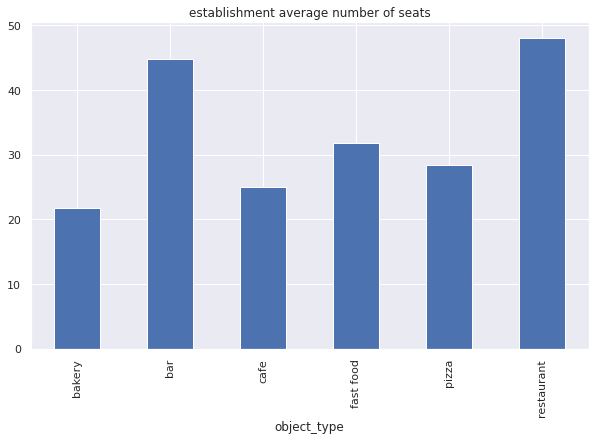

In [82]:
seats_by_type_pt = estab_df.pivot_table(index='object_type', values=['number'], aggfunc=['sum', 'mean'])
seats_by_type_pt.columns = seats_by_type_pt.columns.droplevel(0)
seats_by_type_pt.columns = ['sum','mean']
seats_by_type_pt.sort_values(by='mean')

seats_by_type_pt['mean'].plot(kind="bar");
plt.title('establishment average number of seats');

We can see establishments that are resturant have the heighset mean, 48 seats.<br>
But maybe we have outliers that affect the numbers, lets take care of them and check again.


Lower bound: -34.0
Upper bound: 94.0


,sum,mean
object_type,,
bakery,5032,18.298182
bar,6614,27.106557
cafe,9566,22.561321
fast food,22313,22.838280
pizza,6139,20.463333
restaurant,166615,27.750666


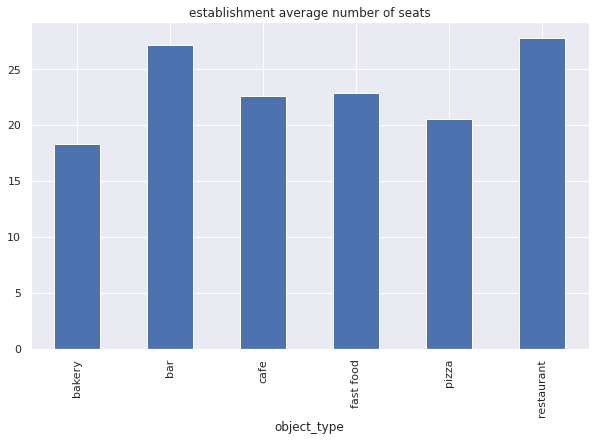

In [84]:
def calc_lower_upper_bounds(df, col_name):
    # calculate Q1 and Q3
    Q1 = df[col_name].quantile(.25)
    Q3 = df[col_name].quantile(.75)

    # calculate IQR
    IQR = Q3-Q1
    # calculate upper and lower bounds for outlier detection
    outlier_lower_bound = Q1 - 1.5*IQR
    outlier_upper_bound = Q3 + 1.5*IQR

    print('Lower bound:', outlier_lower_bound) # don't need this, no value is negative
    print('Upper bound:', outlier_upper_bound)
    return {'lower_bound':outlier_lower_bound, 'upper_bound':outlier_upper_bound}

lower_bound, upper_bound = calc_lower_upper_bounds(estab_df, 'number').values()
filtered_seats = estab_df.query('number < @upper_bound & number > @lower_bound')
filtered_seats_by_type_pt = filtered_seats.pivot_table(index='object_type', values=['number'], aggfunc=['sum', 'mean'])
filtered_seats_by_type_pt.columns = filtered_seats_by_type_pt.columns.droplevel(0)
filtered_seats_by_type_pt.columns = ['sum','mean']
filtered_seats_by_type_pt.sort_values(by='mean')
filtered_seats_by_type_pt['mean'].plot(kind="bar")
display(filtered_seats_by_type_pt)
plt.title('establishment average number of seats');

We have reconfirmed that resturant have the most seats by average but bar is very close vy a very small difference(~0.6).<br>
In absolute numbers, resturant (166615) is the largest more than 100,000 seats compared to bar(6614)

-------------
**Put the data on street names from the address column in a separate column.**<br>
Handeling address names is a complicated task we will a library designed for it, **usaddress**.

In [104]:
def cleaning_tag(raw):
    try:
        if raw.startswith('olvera'):
            clean_adress='olvera,los angeles,usa'
        elif raw.startswith('1033 1/2 los angeles'):
            clean_adress='1033 1/2 los angeles st,los angeles,usa'
        elif raw.startswith('3425 e 1st so. 3rdfl'):
            clean_adress='3425 e 1sT st so. 3rdfl'
        else:
            clean_adress=usaddress.tag(raw)[0]['StreetName']
    except:
        clean_adress='no street'
    return clean_adress

In [105]:
estab_df['address_clean'] = estab_df.address.apply(cleaning_tag)
estab_df

,id,object_name,address,chain,object_type,number,size,address_clean
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26,large,eagle rock
1,11787,reilly's,100 world way # 120,False,restaurant,9,small,world
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,medium,hollywood
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,large,sunset
4,11790,pollen,2100 echo park ave,False,restaurant,20,medium,echo park
...,...,...,...,...,...,...,...,...
9646,21432,hall of justice,217 w temple ave,False,restaurant,122,very large,temple
9647,21433,fin-melrose,5750 melrose ave,False,restaurant,93,very large,melrose
9648,21434,juicy wingz,6741 hollywood blvd,True,fast food,15,medium,hollywood
9649,21435,medidate coffee,548 s spring st ste 100,False,cafe,6,small,spring


We now have a clean address we can use in other searches and continued understanding of establishments.

-----
**Plot a graph of the top ten streets by number of establishment.**

In [133]:
estab_by_streets_pt = estab_df.pivot_table(index='address_clean', values=['size'], aggfunc=['count']).reset_index()
estab_by_streets_pt.columns = estab_by_streets_pt.columns.droplevel(0)
estab_by_streets_pt.columns = ['street_name', 'establishments_num']
estab_by_streets_pt = estab_by_streets_pt.sort_values(by='establishments_num', ascending=False)
estab_by_streets_pt

,street_name,establishments_num
419,sunset,405
469,wilshire,398
359,pico,371
459,western,369
176,figueroa,334
...,...,...
244,jarvis,1
246,judge john aiso,1
249,kingsley,1
251,knox,1


Making sure we have no duplictes.

In [143]:
display(estab_by_streets_pt.duplicated().any())

False

Lets plot a bar chart to see the results.

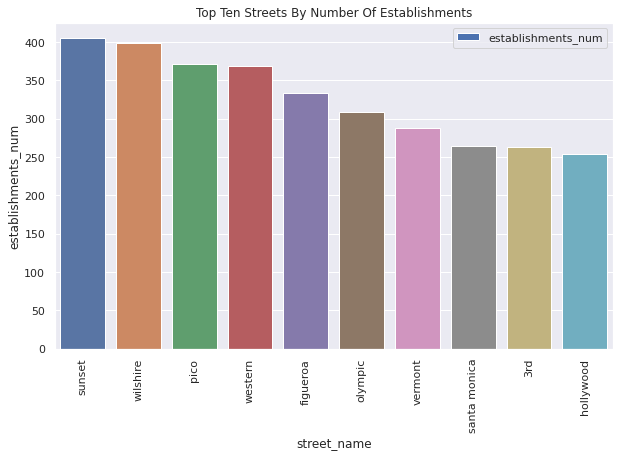

In [144]:
estab_by_streets_pt.head(10).plot(kind='bar')
sns.barplot(x="street_name", y="establishments_num", data=estab_by_streets_pt.head(10))
plt.title('Top Ten Streets By Number Of Establishments');

We can see that **Sunset** street has the most with 405 establishments.

-----
Find the number of streets that only have one establishment.

In [120]:
estab_by_streets_pt[estab_by_streets_pt['establishments_num'] == 1].count()

street_name           194
establishments_num    194
dtype: int64

There are 194 streets with only 1 establishment.<br>


--------
**For streets with a lot of establishments, look at the distribution of the number of seats. What trends can you see?**

Lets filter by number of establishments of the top 10 streets.

In [145]:
top_streets = estab_by_streets_pt.head(10)['street_name'].tolist()
top_streets

['sunset',
 'wilshire',
 'pico',
 'western',
 'figueroa',
 'olympic',
 'vermont',
 'santa monica',
 '3rd',
 'hollywood']

In [154]:
def get_street_order(street):
    return top_streets.index(street)

estab_top_streets = estab_df[estab_df['address_clean'].isin(top_streets)]
estab_top_streets['order'] = estab_top_streets['address_clean'].apply(get_street_order)
estab_top_streets = estab_top_streets.sort_values(by='order')
estab_df[estab_df.number == 50]

,id,object_name,address,chain,object_type,number,size,address_clean


In [151]:
fig = px.scatter(estab_top_streets, x="address_clean", y="number",
                 color = 'object_type'
                )
fig.update_layout(
    showlegend=True,
    plot_bgcolor="white"
)
fig.update_layout(
    title="Number of establishments and type",
    xaxis_title="establishments",
    yaxis_title="number of seats",
    )
fig.show()

We see something very strange, there is a gap between 50 - 60 establishments seats.<br>
I have checked the data previously when loading( We should talk to our team about data gathered)


Other observations:<br>
We see there are streets that have specific a more distributed kind of establishments. For example:<br>
* **Figueroa** has a more uniform distribution of fast food.
* **3rd** has the least distributed seats for resturants
* **3rd** has a more sitributed bakeries.

Since our robotic service is more suitbale for fast food, we should consider opening in **Figueroa**